In [1]:
import Pkg

In [2]:
Pkg.activate(".")

  Activating new project at `C:\Users\thake\BME574 - Julia\Week 5`


In [3]:
Pkg.add(["LinearAlgebra","Random", "FFTW", "Plots"])

    Updating registry at `C:\Users\thake\.julia\registries\General.toml`
   Resolving package versions...
   Installed SimpleBufferStream ─ v1.2.0
   Installed OpenSSL_jll ──────── v3.0.15+1
    Updating `C:\Users\thake\BME574 - Julia\Week 5\Project.toml`
  [7a1cc6ca] + FFTW v1.8.0
  [91a5bcdd] + Plots v1.40.8
  [37e2e46d] + LinearAlgebra
  [9a3f8284] + Random
    Updating `C:\Users\thake\BME574 - Julia\Week 5\Manifest.toml`
  [621f4979] + AbstractFFTs v1.5.0
  [d1d4a3ce] + BitFlags v0.1.9
  [944b1d66] + CodecZlib v0.7.6
  [35d6a980] + ColorSchemes v3.26.0
  [3da002f7] + ColorTypes v0.11.5
  [c3611d14] + ColorVectorSpace v0.10.0
  [5ae59095] + Colors v0.12.11
  [34da2185] + Compat v4.16.0
  [f0e56b4a] + ConcurrentUtilities v2.4.2
  [d38c429a] + Contour v0.6.3
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.20
  [8bb1440f] + DelimitedFiles v1.9.1
  [ffbed154] + DocStringExtensions v0.9.3
  [460bff9d] + ExceptionUnwrapping v0.1.10
  [c87230d0] + FFMPEG v0.4.1
  [7a1cc6

In [5]:
using FFTW, Random, Plots

In [6]:
dt = 0.001
t = 0:dt:1-dt

0.0:0.001:0.999

In [7]:
signal = sin.(2*pi*50*t) + sin.(2*pi*120*t)
signal_clean = signal
signal = signal .+ 2.5 .* randn(length(t))

1000-element Vector{Float64}:
  0.05648238723334733
  5.587320235413493
  1.803446704342522
  2.8109894511595264
  2.1666878666917233
 -0.11588517614916227
 -0.08723421307756549
 -0.9414854176215236
 -0.08860468128533755
  1.836412472092509
  5.74085760221951
 -0.34185828292967657
 -4.210070739045665
  ⋮
 -0.0351533488741505
  0.8869844594985604
  0.4539024708916044
  3.696607788211757
  0.37080231299368616
 -2.586769710571393
 -1.7918641544779796
 -1.9866627958674907
 -2.06408395498996
 -3.9752134454420105
 -2.3073027873526817
 -0.45558376756707386

In [13]:
#fast fourier transform 
n = length(t)
fhat = fft(signal)
PSD = fhat .* conj(fhat) / n
freq = (1/(dt*n)) .* (0:n-1)
L = 1:Int(floor(n/2))

1:500

In [23]:
#filter
indices = real.(PSD) .> 100
denoised = PSD .* indices
fhat = indices .* fhat
ffilt = ifft(fhat)

1000-element Vector{ComplexF64}:
 -0.018129027041476356 + 0.0im
     0.879087246807059 - 5.684341886080802e-17im
    1.4306603241628943 + 3.508304757815495e-17im
     1.483572683048742 + 0.0im
    1.1280124916355756 + 0.0im
    0.6368501397109072 - 7.815970093361102e-17im
    0.3098812472002073 + 7.105427357601002e-18im
    0.3080340491326889 - 8.526512829121202e-17im
     0.567732674493795 + 4.0137557212674634e-17im
    0.8416805205589556 - 5.011758494440015e-17im
    0.8433378055789696 - 2.255559631222585e-17im
    0.4157567064372073 - 1.0283071073757512e-16im
   -0.3680678640576137 + 1.0283071073757512e-16im
                       ⋮
    0.3866072560708395 + 1.7565582446363093e-17im
   -0.3343217660129429 + 5.69392800103502e-17im
   -0.6900743213715912 + 1.1690539905531412e-16im
   -0.6438596738998895 + 1.0147347800158564e-17im
  -0.37950993384220844 + 1.1468112168010742e-16im
   -0.1862889414648082 - 1.745904495068272e-17im
   -0.2878045849991554 + 1.4455083377532815e-17im
   -0.709

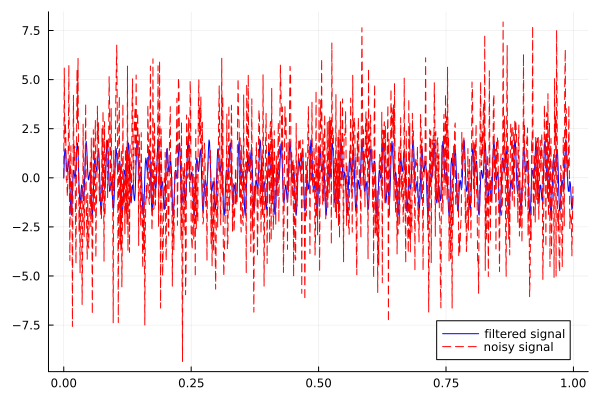

In [29]:
plot(t, real.(ffilt), label = "filtered signal", color=:blue)
plot!(t, signal, label = "noisy signal", linestyle =:dash, color=:red)


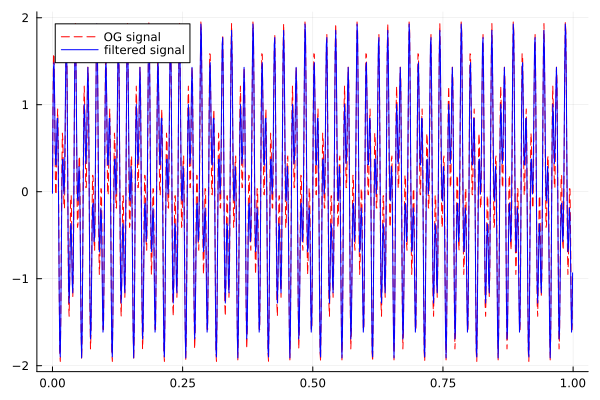

In [31]:
plot(t, signal_clean, label = "OG signal", linestyle =:dash, color=:red)
plot!(t, real.(ffilt), label = "filtered signal", color=:blue)